# 1.2. Исследование эффекта Комптона

## Бутаков Иван, Гладков Андрей

**Цель работы:** с помощью сцинтилляционного спектрометра  исследовать энергетический спектр $\gamma$-квантов, рассеянных на графите. Определить энергию покоя частиц, на которых происходит комптоновское рассеяние.

**Оборудование**: источник $\gamma$-квантов ${}^{137}Cs$ с энергией $662$ кэВ, сцинтиллятор, ФЭУ, графитовая мишень, лимб для отсчета углов.

## Теоретические сведения

Рассеяние $\gamma$-лучей в веществе относится к числу явлений, в которых особенно ясно проявляется двойственная природа излучения: волновая теория плохо описывает рассеяние рентгеновских и $\gamma$-лучей. В частности, она не может объяснить, почему в составе рассеянного излучения кроме исходной длины волны с частотой $\omega_0$ появляется дополнительная длинноволновая компонента, отсутствующая в спектре первичного излучения. 

Появление этой компоненты легко объяснимо, если считать что $\gamma$-излучение представляет собой поток квантов (фотонов), имеющих энергию $h\omega$ и импульс $p=h\frac {\omega}c$. Эффект Комптона интерпретируется как результат упругого соударения двух частиц: гамма-кванта и свободного электрона.

Для эффекта Комптона справедливы следующие теоретические результаты:

$\Delta \lambda = \lambda_1-\lambda_0 = \frac h{mc}(1-\cos \theta) = \Lambda_k(1-\cos \theta)$, где $\Lambda_k = \frac {h}{mc} = 2.42 \cdot 10^{-10}$ cм. - комптоновская длина рассеяния электрона, $\Delta \lambda$ - изменение длины волны рассеянного излучения.

Из формул следует, что комптоновское смещение не зависит ни от длины волны первичного излучения, ни от рода вещества, в котором происходит рассеяние.

Переходя в формуле выше к энергиям излучения, можно получить зависимость $\frac 1{\epsilon(\theta)} - \frac 1{\epsilon_0} = 1 - \cos\theta$, где $\epsilon(\theta)$ и $\epsilon_0$ - энергии фотонов при углах рассеяния $0$ и $\theta$ соответственно.

Заменяя энергию квантов номером канала $N(\theta)$, соответствующего вершине фотопика при указанном угле $\theta$, получаем выражение $\frac 1{N(\theta)} - \frac 1{N(0)} = a(1-\cos \theta)$, где $a$ - коэффициент, измеряемый экспериментально.

Наконец, заметим, что при $\theta = 90^{\circ}$ формула с $\epsilon$ преобразуется к виду $mc^2 \left (\frac 1{E(90)}-\frac 1{E(0)} \right ) = 1$, откуда $E_0=mc^2=E(0)\frac {E(90)}{E(0)-E(90)} = E_{\gamma} \frac {N(90)}{N(0)-N(90)}$.

## Импортирование данных

*phi* - угол в градусах, $N$ - канал, соответствующий максимуму фотопика, *counts* - соответствующее $N$ число отсчетов в канале, $lN$ и $rN$ - номера каналов, соответствующих уменьшению числа отсчетов примерно в два раза от максимума, *lcounts*, *rcounts* - точные значения числа отсчетов для двух предыдущих величин. 

In [1]:
import pandas
import numpy as np

data = pandas.read_csv('data.csv', sep = ' ', header = 0, comment='#', dtype = np.int64)

data

,phi,N,counts,lN,lcounts,rN,rcounts
0,0,906,512,856,244,951,259
1,10,784,455,744,216,828,230
2,20,822,117,763,62,883,57
3,30,772,60,653,32,834,31
4,40,683,59,603,39,763,26
5,50,613,56,555,32,695,28
6,60,535,52,475,27,594,35
7,70,489,64,409,34,534,32
8,80,440,70,391,41,487,41
9,90,391,91,322,49,428,35


### Обозначения

*phi*, $N$, $rN$, $lN$ - те же величины, что и выше.

Погрешность *dphi* измерения угла принимается равной $1^{\circ}$.

$dN$ - погрешность $N$. Оценивается как половина длины интервала, на котором число отсчетов уменьшается примерно в два раза относительно максимума. 

$x = 1-\cos\theta$, $dx$ - его погрешность.

$y = \frac 1N$, $dy$ - его погрешность.

In [2]:
phi = data['phi']
dphi = 1

x = 1 - np.cos(phi * np.pi / 180)
dx = np.abs(dphi * np.pi / 180 * np.sin(phi))

rN = data['rN']
lN = data['lN']
dN = (rN - lN) / 2

N = data['N']
y = 1 / N
dy = dN / N ** 2

line = np.polyfit(x, y, 1)
sp = np.linspace(0, 1.55, 20)
spy = np.polyval(line, sp)

## График

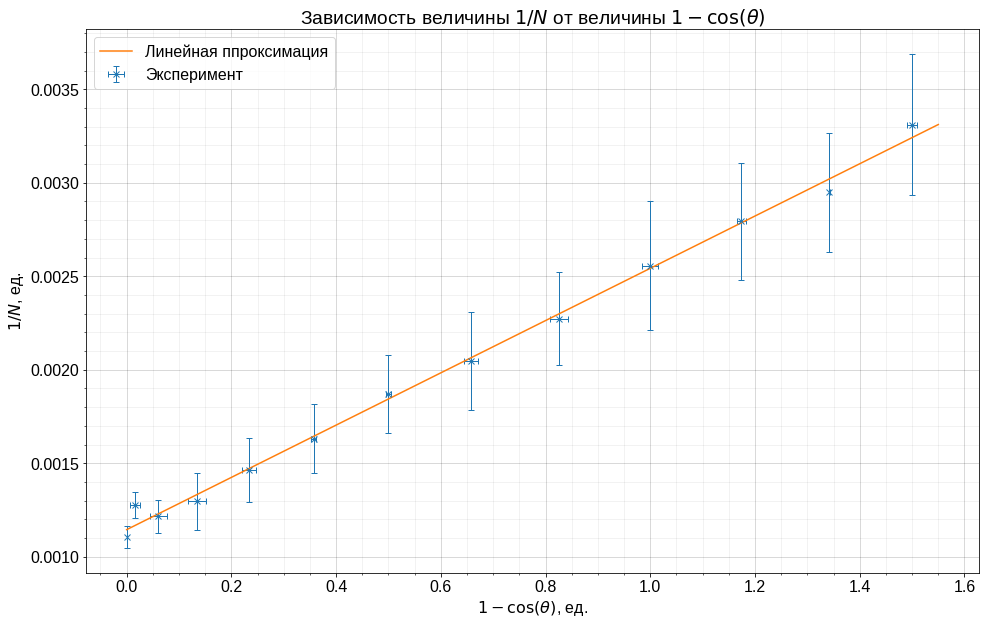

In [7]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

fig, ax = plt.subplots()

ax.set_title("Зависимость величины $1/N$ от величины $1-\\cos(\\theta)$")

fig.set_figheight(10)
fig.set_figwidth(16)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(x, y, xerr = dx, yerr = dy,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = 'Эксперимент')
ax.plot(sp, spy, label = 'Линейная ппроксимация')


ax.set_xlabel('$1-\\cos(\\theta)$, ед.')
ax.set_ylabel('$1/N$, ед.')

ax.legend(loc='upper left')
plt.show();

In [4]:
print('Коэффициенты прямой: a = %f, b = %f' %(line[0], line[1]))

Коэффициенты прямой: a = 0.001398, b = 0.001144


Из графика найдем значения $N(90)$ и $N(0)$:

In [5]:
_1N0 = np.polyval(line, 0)
_1N90 = np.polyval(line, 1)
N0 = 1/_1N0
N90 = 1/_1N90

print('1/N(0) = %f' %(_1N0))
print('1/N(90) = %f' %(_1N90))
print()
print('N(0) = %1.f' %(N0))
print('N(90) = %1.f' %(N90))

1/N(0) = 0.001144
1/N(90) = 0.002543

N(0) = 874
N(90) = 393


Зная это, найдем энергию покоя электронов по формуле $E_0=mc^2 = E_{\gamma}\frac{N(90)}{N(0)-N(90)}$.

Погрешность вычисляем по формуле $\delta E_0 = \frac{E_{\gamma}}{(N(0)-N(90))^2}\sqrt{N(0)^2 \cdot \delta N(0)^2 + N(90)^2 \cdot \delta N(90)^2}$.

In [6]:
E_g = 662 #кэВ

delta1N0 = dy[0]
delta1N90 = dy[10]
deltaN0 = delta1N0 / _1N0 ** 2
deltaN90 = delta1N90 / _1N90 ** 2

deltaE = E_g * np.sqrt((N0 * deltaN0)**2 + (N90 * deltaN90)**2) / (N0 - N90)**2

print('E_0 = %1.f ± %1.f кэВ.' %(E_g * N90 / (N0 - N90), deltaE))

E_0 = 542 ± 123 кэВ.


## Выводы

1. Cнята зависимость $1/N$ от $1-\cos\theta$, доказана её линейность. Это подтверждает правильность формулы для комптоновского рассеяния и состоятельность самого эффекта Комптона.
2. Измерена энергия покоя электронов, на которых идет рассеяние. Она составила $542 \pm 123$ кэВ. Точность полученного результата определяется точностью отсчета угла (точнее одного градуса сложно гарантировать) и погрешностью определения фотопика (возможно, наш подход вычисления погрешности дает завышенные значения).